# this is my note for starting Image Processing 


### In image processing, colors play a crucial role in analyzing and manipulating visual data. Images are typically represented using color models such as RGB (Red, Green, Blue), where each pixel is defined by its intensity in these three primary colors. Other models like HSV (Hue, Saturation, Value) and CMYK (Cyan, Magenta, Yellow, Key/Black) are also used depending on the application.
>  Color information helps in tasks like object detection, segmentation, and enhancement. For instance, in medical imaging, specific color ranges can highlight abnormalities, while in computer vision, color-based filtering can isolate objects of interest. Advanced techniques, such as color space transformations and histogram equalization, are employed to improve image quality and extract meaningful information. Understanding and manipulating colors is essential for achieving accurate and visually appealing results in image processing.

<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h1 style="color: green;">- Colors and filtering</h1>
  <h4 style="color: green;">1- Simplea color filtering<br/> 2- Simple color tracker </h4>

</div>
<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 10px;">
  <h4 style="color:rgb(86, 143, 143) ;">- Amirreza zare <br/> - 3/7/2025 </h4>
</div>

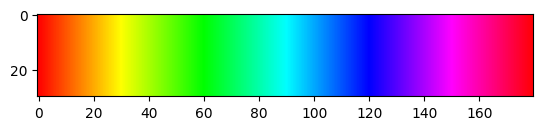

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hue_spectrum = np.linspace(0 , 179 , dtype='uint8' , num =180)
img = np.array([hue_spectrum]*30)
saturation_channel = np.ones_like(img , dtype = 'uint8')*255
value_channel = np.ones_like(img , dtype = 'uint8')*255
hsv = cv2.merge([img , saturation_channel , value_channel])
final_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(final_img[... , ::-1])

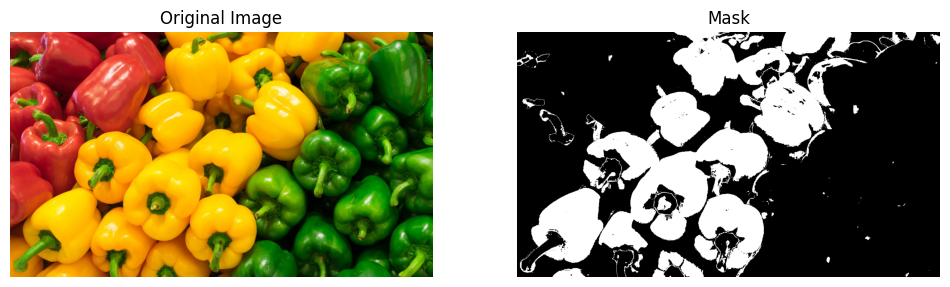

In [6]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('../data/images/felfel-dolme.jpg')

lower = np.array([20 ,50,50])
upper = np.array([35 ,255,255])
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_img, lower, upper)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(img[... , ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122) 
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()

In [7]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

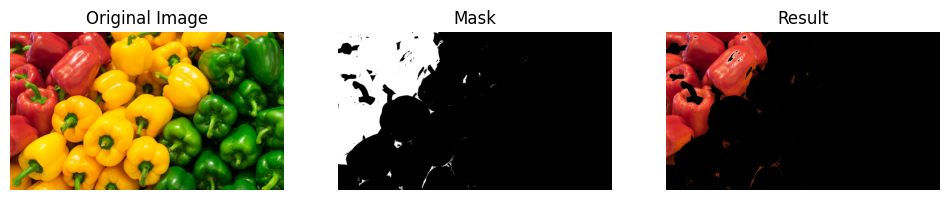

In [10]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('../data/images/felfel-dolme.jpg')


hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower = np.array([0 ,50,50])
upper = np.array([10 ,255,255])
mask_start = cv2.inRange(hsv_img, lower, upper)

lower = np.array([160 ,50,50])
upper = np.array([179 ,255,255])
mask_end = cv2.inRange(hsv_img, lower, upper)



mask = mask_start + mask_end
mask_final = cv2.merge([mask] * 3 )
result = cv2.bitwise_and(img, mask_final)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(img[... , ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(132) 
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(133) 
plt.imshow(result[... , ::-1])
plt.title('Result')
plt.axis('off')
plt.show()

In [11]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

In [18]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../data/videos/blue-track.mp4')

while True : 
    ret , frame = cap.read()
    if not ret :
        break
    hsv = cv2.cvtColor(frame , cv2.COLOR_BGR2HSV)
    
    lower = np.array([100 ,50,50])
    upper = np.array([130 ,255,255])
    
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(frame, frame, mask=mask)
    # cv2.imshow('frame', frame)
    # cv2.imshow('mask', mask)
    cv2.imshow('result', result)
    key = cv2.waitKey(5) & 0xFF
    if key == 27 :
        break
cv2.destroyAllWindows()
cap.release()

In [19]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../data/videos/blue-track.mp4')

while True : 
    ret , frame = cap.read()
    if not ret :
        break
    hsv = cv2.cvtColor(frame , cv2.COLOR_BGR2HSV)
    
    lower = np.array([100 ,50,50])
    upper = np.array([130 ,255,255])
    
    mask = cv2.inRange(hsv, lower, upper)
    contours , _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    center , radius = cv2.minEnclosingCircle(contours[0])
    center = (int(center[0]), int(center[1]))
    radius = int(radius)
    cv2.circle(frame, center, radius, (0, 0, 255), 2)
    cv2.imshow('frame', frame)

    key = cv2.waitKey(5) & 0xFF
    if key == 27 :
        break
cv2.destroyAllWindows()
cap.release()

In [2]:
# FREE UP MEMORY AND RESOURCES
import gc

gc.collect()
%reset -f

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_blue = np.array([100,50,50])
    upper_blue = np.array([130,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()